<a href="https://colab.research.google.com/github/wllgrnt/keras-examples/blob/master/Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6
## Deep Learning for text and sequences

In [3]:
import keras
import numpy as np
import string
import zipfile
import os
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## Working with text data

Before we run a deep learning model on text, we have to convert the text into a numeric tensor. We can e.g. segment into words, segment into characters, or extract n-grams - this is tokenisation. Then we associate each token with a vector, and pack those vectors into a tensor. Here we look at two ways of associating a word with a token:


### One-hot encoding

In [0]:
# Word-level one-hot encoding

# Here we ignore special characters and punctuation.
samples = ["The cat sat on the mat.", "The dog ate my homework."]

token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1
      
# Only consider the first max_length words in each sample
max_length = 10

results = np.zeros(shape=(len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i,j,index] = 1
    
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [0]:
# Character-level one-hot encoding (had to modify this from the example, Challot's code doesn't run)

# Here we only consider ASCII.
samples = ["The cat sat on the mat.", "The dog ate my homework."]

characters = string.printable
token_index = dict(zip(characters, range(1, len(characters)+1)))

# Only consider the first max_length characters in each sample
max_length = 50
results = np.zeros(shape=(len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i,j,index] = 1
    
print(results[0]) # 2 samples

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
print(token_index)

{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100}


Keras has built-ins for both the above which take account of edge cases, special characters, and  only taking the N most common words, so we'll use those

In [0]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = keras.preprocessing.text.Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

# Turn strings into lists of integer indices
sequences = tokenizer.texts_to_sequences(samples)

# Alternatively, directly get the one-hot binary representations.
one_hot_results = tokenizer.texts_to_matrix(samples, mode="binary")

word_index = tokenizer.word_index

print(f"Found {len(word_index)} unique tokens")

Found 9 unique tokens


A variant of one-hot encoding is the one-hot hashing trick - rather than explicitly assigning an index to each word and keeping a reference of these indices, hash words into fixed-size vectors - this does away with the explicit word index

In [0]:
# One-hot with hashing

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# Store each word as a size-1000 vector
dimensionality = 1000
max_length = 10
results=np.zeros((len(samples), max_length, dimensionality))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality # Hash to an integer
    results[i,j,index] = 1

### Using word embeddings
Here we use dense word vectors (as opposed to sparse, binary, high-dimensional vectors as in one-hot). These will be floating-point vectors in a low-dimensional space, and we have to learn these from the data.

We can either learn the embedding jointly with the main task, or use pretrained word embeddings

In [0]:
# Learning our own embeddings, hopefully such that the geometry reflects the semantics

max_features=10000
max_length = 20

# Overwrite np.load to allow keras to work with the new Numpy defaults
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)
np.load = old
del(old)



# Turns the list of integers into a 2D integer tensor
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
model = keras.models.Sequential()
# embedding has inputs: (number of possible tokens, dimensionality)
model.add(keras.layers.Embedding(max_features, 8, input_length=max_length))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.summary()

W0618 10:40:22.205598 140446760609664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 10:40:22.241738 140446760609664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 10:40:22.249669 140446760609664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 10:40:22.286149 140446760609664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0618 10:40:22.303842 140446760609664 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

W0618 10:40:22.527907 140446760609664 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 274us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 2s 101us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 2s 101us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 2s 100us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 2s 99us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 2s 98us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 2s 100us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - val

We can get to a validation accuracy of ~75%, seems pretty good from only the first 20 words. However, flattening the embedding sequences and training a single `Dense` layer means we look at each word  separately - this is bad. We have to learn features that account for the sequence as a whole! 

In [0]:
# Using pretrained word embeddings (could use Word2Vec, here we use GloVe)

# First, download the raw text data from the IMDB dataset.
!wget --no-check-certificate \
    http://mng.bz/0tIo \
    -O /tmp/aclimdb.zip
zip_ref = zipfile.ZipFile("/tmp/aclimdb.zip", 'r')
zip_ref.extractall('/tmp')
zip_ref.close()



--2019-06-18 10:50:28--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2019-06-18 10:50:28--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2019-06-18 10:50:28--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.232.245
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.232.245|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘/tmp/aclimdb.zip’

/tmp/aclimdb.zip    100%[===================>]  57.90M  50.8MB/s    in 1.1s    

2019-06-18 10:50:29 (50.8 MB/s) - ‘/tmp/aclimdb.zip’

In [0]:
# Scrape the data into lists 
imdb_dir = "/tmp/aclImdb"
train_dir = os.path.join(imdb_dir, "train")

labels = []
texts = []

for label_type in ["neg", "pos"]:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == ".txt":
      with open(os.path.join(dir_name, fname)) as flines:
        texts.append(flines.read())
      labels.append(0 if label_type == "neg" else 1)
      

In [0]:
# Tokenize our text. Here, we artifically limit ourselves to just 200 training samples

max_length = 20
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

print(f"Found {len(word_index)} unique tokens")

data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length)
labels = np.asarray(labels)

print(f"Shape of data tensor: {data.shape}")
print(f"Shape of label tensor: {labels.shape}")

# Shuffle and split the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

X_train = data[:training_samples]
y_train = labels[:training_samples]
X_val = data[training_samples: training_samples+validation_samples]
y_val = labels[training_samples: training_samples+validation_samples]



Found 88582 unique tokens
Shape of data tensor: (25000, 20)
Shape of label tensor: (25000,)


In [0]:
# Download the GloVe embeddings
!wget --no-check-certificate \
    http://nlp.stanford.edu/data/glove.6B.zip \
    -O /tmp/glove.6B.zip
zip_ref = zipfile.ZipFile("/tmp/glove.6B.zip", 'r')
zip_ref.extractall('/tmp')
zip_ref.close()




--2019-06-18 11:03:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-06-18 11:03:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-06-18 11:03:32--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’

/t

In [0]:
# Parse the embeddings into an index mapping words to their vector reprs
glove_path = "/tmp/glove.6B.100d.txt"

embeddings_index = {}
with open(glove_path) as flines:
  for line in flines:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
    
print(f"Found {len(embeddings_index)} word vectors")

Found 400000 word vectors


In [0]:
# Now build an embedding matrix we can load into an Embedding layer

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [0]:
# Define our model
model = keras.models.Sequential()
model.add(keras.layers.Embedding(max_words, embedding_dim, input_length=max_length))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                64032     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,064,065
Trainable params: 1,064,065
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Load the GloVe matrix into the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [0]:
# Compile and train
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
model.save_weights("/content/drive/My Drive/Colab Notebooks/pre_trained_glove_model.h5")

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.7453 - acc: 0.5450 - val_loss: 0.7165 - val_acc: 0.4969
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5676 - acc: 0.7500 - val_loss: 0.7809 - val_acc: 0.5051
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4935 - acc: 0.7400 - val_loss: 0.7351 - val_acc: 0.4999
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3533 - acc: 0.9450 - val_loss: 0.9398 - val_acc: 0.5013
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3361 - acc: 0.8600 - val_loss: 0.8728 - val_acc: 0.5067
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2509 - acc: 0.9600 - val_loss: 0.9588 - val_acc: 0.5030
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2062 - acc: 0.9750 - val_loss: 0.8176 - val_acc: 0.4989
Epoch 8/10
200/200 [========

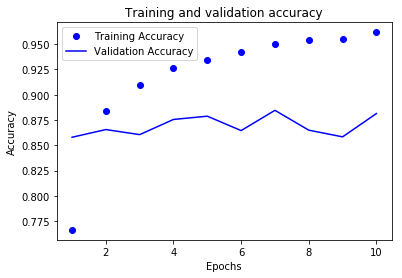

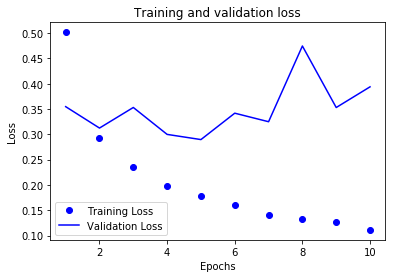

In [0]:
# Plot the loss and accuracy of the model over the training and validation data
def plotLossAndAccuracy(history):
  history_dict = history.history
  acc = history_dict["acc"]
  val_acc = history_dict["val_acc"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]
  epochs = range(1, len(loss) +1)

  plt.plot(epochs, acc, "bo", label="Training Accuracy")
  plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  plt.plot(epochs, loss, "bo", label="Training Loss")
  plt.plot(epochs, val_loss, "b", label="Validation Loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

plotLossAndAccuracy(history)


Hefty amounts of overfitting! What happens if we don't use the pretrained word embeddings, and don't freeze the embedding layer?

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6942 - acc: 0.4700 - val_loss: 0.6938 - val_acc: 0.4912
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6221 - acc: 1.0000 - val_loss: 0.6948 - val_acc: 0.4978
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5474 - acc: 1.0000 - val_loss: 0.6970 - val_acc: 0.4938
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4386 - acc: 1.0000 - val_loss: 0.7016 - val_acc: 0.4989
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3121 - acc: 1.0000 - val_loss: 0.7094 - val_acc: 0.4982
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2039 - acc: 1.0000 - val_loss: 0.7197 - val_acc: 0.4978
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1280 - acc: 1.0000 - val_loss: 0.7295 - val_acc: 0.4964
Epoch 8/10
200/200 [========

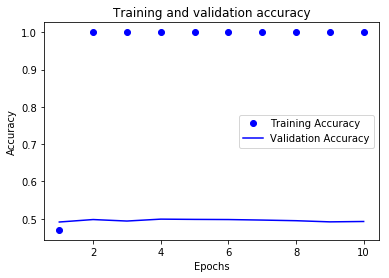

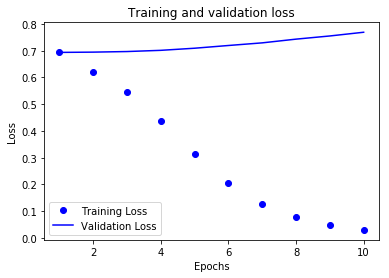

In [0]:
# Define our model
model = keras.models.Sequential()
model.add(keras.layers.Embedding(max_words, embedding_dim, input_length=max_length))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
# Compile and train
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
plotLossAndAccuracy(history)


In [0]:
# Evaluate the model on the test data

test_dir = os.path.join(imdb_dir, "test")

labels = []
texts = []

for label_type in ["neg", "pos"]:
  dir_name = os.path.join(test_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == ".txt":
      with open(os.path.join(dir_name, fname)) as flines:
        texts.append(flines.read())
      labels.append(0 if label_type == "neg" else 1)
      

sequences = tokenizer.texts_to_sequences(texts)
X_test = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length)
y_test = np.asarray(labels)    


In [0]:
model.load_weights("/content/drive/My Drive/Colab Notebooks/pre_trained_glove_model.h5")
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 1s 44us/step


[0.8860045902633668, 0.50624]

Only 50% accuracy!

## Recurrent Neural Networks

The dense classifiers and convnets seen previously don't have any memory - each input is processed independently. So to process a sequence, you have to show the entire sequence to the network at once. These are *feedforward* networks.

RNNs are different - they iterate through the sequence elemetns and maintain a state containing information relative to what they've seen so far. The state is reset between independent  elements, so one sequence is still a single data point.

Pseudocode for the forward pass of a toy RNN

```
state_t = 0
for input_t in input_sequences:
   output_t = f(input_t, state_t)
   state_t = output_t
```

And we know what the function `f` looks like:
```
f(input_t, state_t) = activation(dot(W, input_t) + dot(U, state_t) + b)
```
It is parameterised by two weight matrices and a bias vector.

In [0]:
# Actual, if naive, Numpy implementation of the forward pass

timesteps = 100
# Dimensionality of the input feature space
input_features = 32
# Dimensionality of the output feature space
output_features = 64

inputs  = np.random.random((timesteps, input_features)) # input data

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  
  successive_outputs.append(output_t)
  
  state_t = output_t
  
# The final output is a 2D tensor of shape (timesteps, output_features)
final_output_sequence = np.concatenate(successive_outputs, axis=0)

The above process is implemented in Keras as the `SimpleRNN` layer - see below for an example

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(10000, 32))
model.add(keras.layers.SimpleRNN(32))  # Only returns the last output for each sequence
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(10000, 32))
model.add(keras.layers.SimpleRNN(32, return_sequences=True))  # Returns the full state sequence
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [0]:
# If you want to stack recurrent layers to increase the representational power of the network,
# You need to have all the intermediate layers return full sequences 
model = keras.models.Sequential()
model.add(keras.layers.Embedding(10000, 32))
model.add(keras.layers.SimpleRNN(32, return_sequences=True))
model.add(keras.layers.SimpleRNN(32, return_sequences=True))
model.add(keras.layers.SimpleRNN(32, return_sequences=True))
model.add(keras.layers.SimpleRNN(32))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Let's use such a model on the IMDB dataset

# Load the data

max_features=10000
max_length = 500

print("Loading data...")

# Overwrite np.load to allow keras to work with the new Numpy defaults
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)
(input_train, y_train), (input_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)
np.load = old
del(old)

print(f"{len(input_train)} training sequences")
print(f"{len(input_test)} test sequences")


print("Pad sequences (samples x time)")

input_train = keras.preprocessing.sequence.pad_sequences(input_train, maxlen=max_length)
input_test = keras.preprocessing.sequence.pad_sequences(input_test, maxlen=max_length)

print(f"input_train shape: {input_train.shape}")
print(f"input_test shape: {input_test.shape}")

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 training sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(max_features, 32))
model.add(keras.layers.SimpleRNN(32))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.6449 - acc: 0.6173 - val_loss: 0.5848 - val_acc: 0.6854
Epoch 2/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.4435 - acc: 0.8116 - val_loss: 0.5315 - val_acc: 0.7252
Epoch 3/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.3148 - acc: 0.8742 - val_loss: 0.3472 - val_acc: 0.8604
Epoch 4/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.2243 - acc: 0.9131 - val_loss: 0.3717 - val_acc: 0.8420
Epoch 5/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1457 - acc: 0.9480 - val_loss: 0.3848 - val_acc: 0.8688
Epoch 6/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.0921 - acc: 0.9692 - val_loss: 0.5683 - val_acc: 0.8282
Epoch 7/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.0655 - acc: 0.9794 - val_loss: 0.5601 - val_acc:

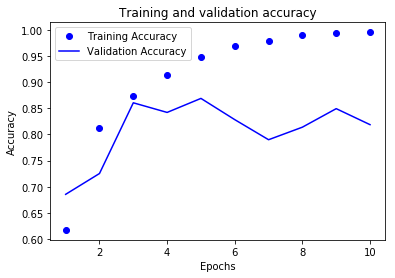

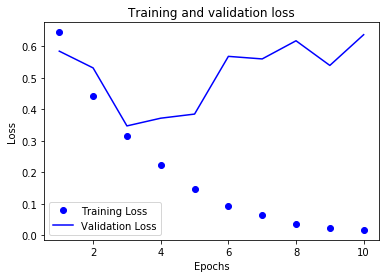

In [0]:
plotLossAndAccuracy(history)

The super-naive Chapter 3 baseline got us to a test accuracy of ~88%, so the small RNN doesn't do well compared to this baseline. Our inputs only consider the first 500 words, so our model has less information than the baseline. In addition, `SimpleRNN` isn't good at long sequences. Let's try something fancier.

### LSTM and GRU

The LSTM is an attempt to solve the vanishing gradient problem, which makes long-term dependencies in our data difficult to learn. It adds a "carry layer" c_t to our data flow (in addition to state, and input).

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(max_features, 32))
model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

W0619 09:02:09.064861 140188709402496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 09:02:09.112024 140188709402496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 09:02:09.119617 140188709402496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 09:02:09.381532 140188709402496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0619 09:02:09.404931 140188709402496 deprecation_wrappe

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 144s 7ms/step - loss: 0.5016 - acc: 0.7665 - val_loss: 0.3547 - val_acc: 0.8580
Epoch 2/10
20000/20000 [==============================] - 139s 7ms/step - loss: 0.2936 - acc: 0.8839 - val_loss: 0.3124 - val_acc: 0.8656
Epoch 3/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.2349 - acc: 0.9101 - val_loss: 0.3530 - val_acc: 0.8606
Epoch 4/10
20000/20000 [==============================] - 139s 7ms/step - loss: 0.1983 - acc: 0.9267 - val_loss: 0.2999 - val_acc: 0.8756
Epoch 5/10
20000/20000 [==============================] - 140s 7ms/step - loss: 0.1775 - acc: 0.9344 - val_loss: 0.2896 - val_acc: 0.8788
Epoch 6/10
20000/20000 [==============================] - 139s 7ms/step - loss: 0.1608 - acc: 0.9422 - val_loss: 0.3417 - val_acc: 0.8646
Epoch 7/10
20000/20000 [==============================] - 139s 7ms/step - loss: 0.1398 - acc: 0.9502 - val_loss: 0.3249 - v

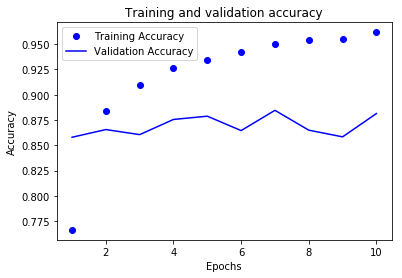

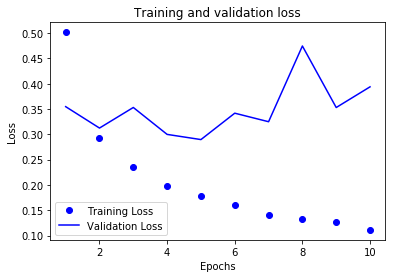

In [0]:
plotLossAndAccuracy(history)

The accuracy jumps up significantly, compared to the `SimpleRNN` network. It doesn't do better because analysing the global, long-term structure of the reviews (which the LSTM is good at) isn't a great way of doing sentiment analysis - word frequency analysis does better. But for more complicated problems, it's helpful.

## Advanced use of recurrent neural networks

Three advanced techniques for improving the performance/generalisability of RNNs, demonstrated on a temperature forecasting problem.

In [5]:
# First, download the raw  data  (14 different atmospheric quantities + temperature over 7 years).
!wget --no-check-certificate \
    https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip \
    -O /tmp/climatedata.zip
zip_ref = zipfile.ZipFile("/tmp/climatedata.zip", 'r')
zip_ref.extractall('/tmp')
zip_ref.close()



--2019-06-19 21:25:53--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.135.37
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.135.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘/tmp/climatedata.zip’

/tmp/climatedata.zi 100%[===================>]  12.94M  23.7MB/s    in 0.5s    

2019-06-19 21:25:54 (23.7 MB/s) - ‘/tmp/climatedata.zip’ saved [13568290/13568290]



In [6]:
fname = "/tmp/jena_climate_2009_2016.csv"

# Chollet processes this into a Numpy array manually, but here we'll use Pandas

df = pd.read_csv(fname, index_col=0, parse_dates=True)

df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [0]:
# Convert to a Numpy array
float_data = df.to_numpy()

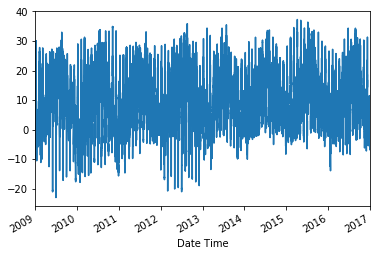

In [0]:
df["T (degC)"].plot()

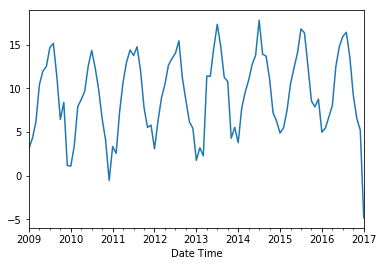

In [0]:
# Because it's a time series, we can do nice things like downsampling
df["T (degC)"].resample('M').mean().plot()


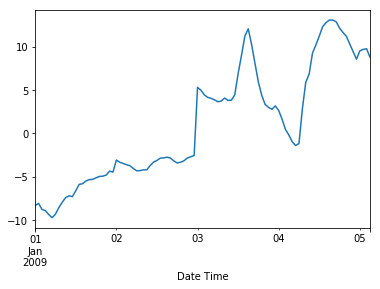

In [0]:
# There's clear seasonality, but can we predict on a daily scale?
df["T (degC)"].resample("H").mean().iloc[:100].plot()

### Preparing the data

Goal - given data going as far back as `lookback` timesteps and sampled every `steps` timesteps, can you predict the temperature in `delay` timesteps?
Use:
- `lookback=720` (i.e. 5 days)
- `steps=6` (one data point per hour)
- `delay=144` (target is 24 hours in the future)

Steps:
-  Preprocess the data so a neural network can ingest it: it's already vectorized, just needs normalization.
- Write a Python generator that takes the current array of float data and yields batchs from the recent past, along with a target temperature in the future.

We'll use the first 200,000 timesteps as training data.

In [0]:
# Normalize
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [0]:
# Generator yielding timeseries samples and their targets

def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
  """
  Parameters
  ----------
  data : 2d numpy array
      The array of floating-point timeseries data, normalized.
  lookback : int
      How many timesteps back the input data should go.
  delay: int
      How many timesteps in the future the target should be.
  min_index: int
      The lower bound of timesteps to draw from (helps keep validation/test data separate) 
  max_index: int
      The upper bound of timesteps to draw from (helps keep validation/test data separate)
  shuffle: bool
      Whether to shuffle the samples or draw them in chronological order
  batch_size: int
      The number of samples per batch.
  step: int
      The period, in timesteps, at which you sample data.
  """
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while True:
    if shuffle:
      rows = np.random.randint(min_index+lookback, max_index, size=batch_size)
    else:
      if i+batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i+batch_size, max_index))
      i += len(rows)
      
    samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]  # temperature is the second column
    yield samples, targets
    

In [0]:
# Create a training, validation, and test generator looking at different segments of the data
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size
                     )
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size
                   )
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size
                    )

# How many steps to draw from val_gen in order to see the entire validation set
val_steps = (300000 - 200001 - lookback) // batch_size
# As above, for the test set
val_steps = (len(float_data) - 300001 - lookback) // batch_size


### A non-ML baseline

As a sanity check, we will predict that the temperature in 24 hours is always equal to the current temperature, and evaluate this with MAE

In [0]:
def evaluate_naive_method():
  batch_maes = []
  for step in range(val_steps):
    samples, targets = next(val_gen)
    preds = samples[:, -1, 1]
    mae = np.mean(np.abs(preds-targets))
    batch_maes.append(mae)
  print(f"{np.mean(batch_maes):.3f}")
  return np.mean(batch_maes)
  
  
naive_mae = evaluate_naive_method()

0.290


In [0]:
# The MAE of 0.29 isn't really interpretable, as it's on normalised data.
# Multiply by the standard deviation of temperature
temperature_std = pd.read_csv(fname, index_col=0)["T (degC)"].iloc[:200000].std()

print(f"Naive MAE in degrees: {temperature_std*naive_mae:.2f}")

Naive MAE in degrees: 2.57


### Basic ML approach

Just flatten the data and run it through two `Dense` layers

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(1))  # Note no activation on this layer

model.compile(optimizer=keras.optimizers.RMSprop(), loss="mae")

history = model.fit_generator(train_gen,
                             steps_per_epoch=500,
                             epochs=20,
                             validation_data=val_gen,
                             validation_steps=val_steps
                             )

W0619 21:27:16.045388 139653638489984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 21:27:16.086187 139653638489984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 21:27:16.104385 139653638489984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 21:27:16.142210 139653638489984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0619 21:27:16.271670 139653638489984 deprecation_wrappe

Epoch 1/20
500/500 [==============================] - 16s 31ms/step - loss: 1.2454 - val_loss: 0.5652
Epoch 2/20
500/500 [==============================] - 12s 24ms/step - loss: 0.4085 - val_loss: 0.3954
Epoch 3/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2914 - val_loss: 0.3007
Epoch 4/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2669 - val_loss: 0.3120
Epoch 5/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2540 - val_loss: 0.3109
Epoch 6/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2463 - val_loss: 0.3121
Epoch 7/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2364 - val_loss: 0.3032
Epoch 8/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2316 - val_loss: 0.3124
Epoch 9/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2269 - val_loss: 0.3236
Epoch 10/20
500/500 [==============================] - 12s 24ms/step - loss: 0.222

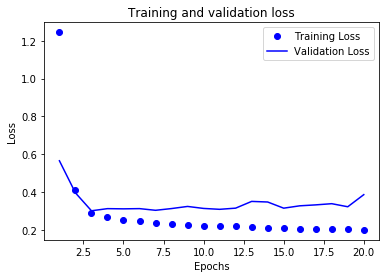

In [12]:
def plotLoss(history):
  history_dict = history.history
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]
  epochs = range(1, len(loss) +1)

  plt.plot(epochs, loss, "bo", label="Training Loss")
  plt.plot(epochs, val_loss, "b", label="Validation Loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
#   plt.xlim(2,)
#   plt.ylim(0,0.5)
  plt.show()

plotLoss(history)

Actually, we can't do better than the common-sense baseline with this method!

### First recurrent baseline

The first model flattened everything, removing any notion of time. Let's try a recurrent model instead, using the Gated Recurrent Unit (GRU) layer. (Like LSTM, cheaper but perhaps with less representational power)

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(keras.layers.Dense(1))

model.compile(optimizer=keras.optimizers.RMSprop(), loss="mae")

history = model.fit_generator(train_gen,
                             steps_per_epoch=500,
                             epochs=20,
                             validation_data=val_gen,
                             validation_steps=val_steps
                             )

Epoch 1/20
500/500 [==============================] - 220s 439ms/step - loss: 0.3118 - val_loss: 0.2623
Epoch 2/20
500/500 [==============================] - 218s 436ms/step - loss: 0.2835 - val_loss: 0.2661
Epoch 3/20
500/500 [==============================] - 218s 437ms/step - loss: 0.2771 - val_loss: 0.2679
Epoch 4/20
500/500 [==============================] - 218s 437ms/step - loss: 0.2721 - val_loss: 0.2749
Epoch 5/20
500/500 [==============================] - 220s 439ms/step - loss: 0.2668 - val_loss: 0.2625
Epoch 6/20
500/500 [==============================] - 220s 439ms/step - loss: 0.2616 - val_loss: 0.2781
Epoch 7/20
500/500 [==============================] - 220s 441ms/step - loss: 0.2563 - val_loss: 0.2743
Epoch 8/20
500/500 [==============================] - 220s 440ms/step - loss: 0.2499 - val_loss: 0.2716
Epoch 9/20
500/500 [==============================] - 220s 439ms/step - loss: 0.2438 - val_loss: 0.2760
Epoch 10/20
500/500 [==============================] - 221s 442m

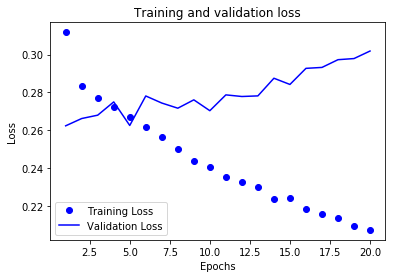

In [0]:
plotLoss(history)

### Using recurrent dropout to prevent overfitting

The loss curves show clear overfitting. But naive Dropout won't help - instead, we need the same dropout mask applied at every timestep (and should be applied to the inner recurrent activations of the GRU and LSTM layers). 

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.GRU(32,
                           dropout=0.2,
                           recurrent_dropout=0.2,
                           input_shape=(None, float_data.shape[-1])))
model.add(keras.layers.Dense(1))

model.compile(optimizer=keras.optimizers.RMSprop(), loss="mae")

history = model.fit_generator(train_gen,
                             steps_per_epoch=500,
                             epochs=40,  # Twice as many epochs, as dropout makes convergence slower
                             validation_data=val_gen,
                             validation_steps=val_steps
                             )

W0619 13:50:51.928678 140188709402496 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Epoch 1/40
500/500 [==============================] - 249s 497ms/step - loss: 0.3526 - val_loss: 0.2767
Epoch 2/40
500/500 [==============================] - 247s 494ms/step - loss: 0.3151 - val_loss: 0.2720
Epoch 3/40
500/500 [==============================] - 247s 495ms/step - loss: 0.3088 - val_loss: 0.2718
Epoch 4/40
500/500 [==============================] - 247s 495ms/step - loss: 0.3040 - val_loss: 0.2684
Epoch 5/40
500/500 [==============================] - 247s 495ms/step - loss: 0.3016 - val_loss: 0.2650
Epoch 6/40
500/500 [==============================] - 247s 495ms/step - loss: 0.2981 - val_loss: 0.2692
Epoch 7/40
500/500 [==============================] - 247s 495ms/step - loss: 0.2961 - val_loss: 0.2679
Epoch 8/40
500/500 [==============================] - 247s 493ms/step - loss: 0.2926 - val_loss: 0.2716
Epoch 9/40
500/500 [==============================] - 247s 494ms/step - loss: 0.2933 - val_loss: 0.2631
Epoch 10/40
500/500 [==============================] - 246s 492m

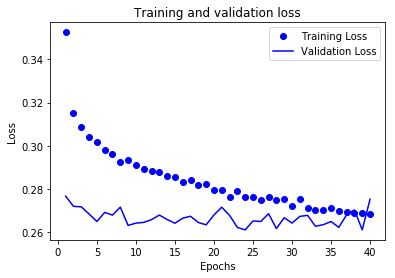

In [0]:
plotLoss(history)

Recurrent dropout successfully prevents overfitting, and the validation scores have now stabilised. But the scores aren't improving much!

### Stacking recurrent layers

We've not overfitting, but we've hit a performance bottleneck - time to increase the model capacity. Let's stack some GRUs.

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.GRU(32,
                           dropout=0.1,
                           recurrent_dropout=0.5,
                           return_sequences=True,
                           input_shape=(None, float_data.shape[-1])
                          ))
model.add(keras.layers.GRU(64,
                           activation="relu",
                           dropout=0.1,
                           recurrent_dropout=0.5,
                           ))

model.add(keras.layers.Dense(1))

model.compile(optimizer=keras.optimizers.RMSprop(), loss="mae")

history = model.fit_generator(train_gen,
                             steps_per_epoch=500,
                             epochs=40,  # Twice as many epochs, as dropout makes convergence slower
                             validation_data=val_gen,
                             validation_steps=val_steps
                             )

W0619 21:31:29.914033 139653638489984 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0619 21:31:30.739833 139653638489984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/40
500/500 [==============================] - 405s 809ms/step - loss: 0.3349 - val_loss: 0.2785
Epoch 2/40
500/500 [==============================] - 403s 805ms/step - loss: 0.3123 - val_loss: 0.2722
Epoch 3/40
500/500 [==============================] - 401s 802ms/step - loss: 0.3069 - val_loss: 0.2724
Epoch 4/40
500/500 [==============================] - 400s 800ms/step - loss: 0.3018 - val_loss: 0.2699
Epoch 5/40
500/500 [==============================] - 398s 796ms/step - loss: 0.2969 - val_loss: 0.2678
Epoch 6/40
500/500 [==============================] - 400s 799ms/step - loss: 0.2953 - val_loss: 0.2762
Epoch 7/40
500/500 [==============================] - 398s 796ms/step - loss: 0.2931 - val_loss: 0.2696
Epoch 8/40
500/500 [==============================] - 396s 792ms/step - loss: 0.2892 - val_loss: 0.2733
Epoch 9/40
500/500 [==============================] - 396s 792ms/step - loss: 0.2881 - val_loss: 0.2691
Epoch 10/40
500/500 [==============================] - 396s 792m

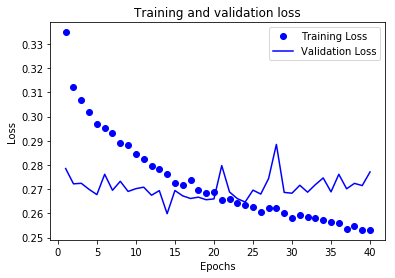

In [14]:
plotLoss(history)

We see that adding an additional RNN layer does improve the results, though not significantly. 

### Bidirectional RNNs